# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Функция count_debt - считает количество людей, имеющих долг, из выборки 
def count_debt(value):
    return f'{value.mean() * value.count():.0f}'

# Функция percent_debt - считает процент людей, имеющих долг, из выборки 
def percent_debt(value):
    return f'{value.mean():.1%}'

# Группируем данные по столбцу children, применяем к столбцу debt функции c помощью метода agg()
data.groupby('children')['debt'].agg(['count', count_debt, percent_debt])


,count,count_debt,percent_debt
children,,,
0,14091,1063,7.5%
1,4808,444,9.2%
2,2052,194,9.5%
3,330,27,8.2%
4,41,4,9.8%
5,9,0,0.0%


<BarContainer object of 6 artists>

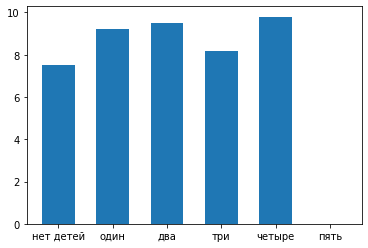

In [23]:
# Результирующую таблицу сохраняем в отдельной переменной, для сохранения столбца со значением процентов.
table_1 = data.groupby('children')['debt'].agg(['count', count_debt, percent_debt])

# С помощью генератора списков пробегаемся по столбцу и меняем строковые значения на float. 
value = [float(i[:-1]) for i in table_1['percent_debt']]
names = ['нет детей','один','два','три','четыре','пять']

# Строим столбчатую диаграмму:
plt.bar(names, height = value, width=0.6)
plt.show()

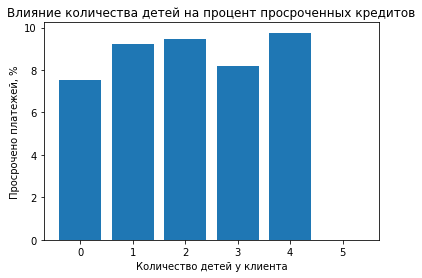

In [24]:
# Код ревьюера

import matplotlib.pyplot as plt

# группируем данные по количеству детей ('children'), затем применяем агрегирующие функции к столбцу 'debt'
grouped_data = data.groupby('children')['debt'].agg(['count', 'mean', 'sum'])
# функция reset_index используется для преобразования индекса в столбец данных
grouped_data.reset_index(inplace=True)
# используем график к таблице
plt.bar(grouped_data['children'], grouped_data['mean']*100) # умножаем на 100, чтобы перевести в проценты
# подписываем
plt.title("Влияние количества детей на процент просроченных кредитов")
plt.xlabel("Количество детей у клиента")
plt.ylabel("Просрочено платежей, %")
plt.xticks(grouped_data['children'])
plt.show()

**Вывод:** Наибольшая часть выборки - это люди, не имеющие детей. Поэтому разумно проводить сравнение относительно данной группы. Процент должников в семьях с одним и двумя детьми на 1,5-2% больше, чем у группы без детей. Рассматривая группы людей, имеющих 3-4 ребенка, можно также наблюдать повышение проценnа на 0,7-2,3%. С увеличением количества детей в семьях - уменьшается выборка, что может сказаться на точности результатов. В семьях с 5-ю детьми должников не наблюдается, т.к. количество таких семей всего 9. Подводя итоги можно сказать, что **зависимость**, между количеством детей и возвратом кредита в срок, **имеется**. **С увеличением количества детей, процент задолжников растет.**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
# Группируем данные по столбцам family_status и family_status_id, проводим со столбцом debt аналогичные предыдущему заданию операции.
# Отсортируем значения для удобства восприятия информации.
data.groupby(['family_status','family_status_id'])['debt'].agg(['count', count_debt, percent_debt]).sort_values('family_status_id')

,,count,count_debt,percent_debt
family_status,family_status_id,,,
женат / замужем,0,12261,927,7.6%
гражданский брак,1,4134,385,9.3%
вдовец / вдова,2,951,63,6.6%
в разводе,3,1189,84,7.1%
Не женат / не замужем,4,2796,273,9.8%


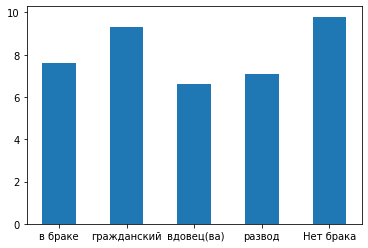

In [26]:
table_2 = data.groupby(['family_status','family_status_id'])['debt'].agg(['count', count_debt, percent_debt]).sort_values('family_status_id')

value = [float(i[:-1]) for i in table_2['percent_debt']]
names = ['в браке','гражданский',' вдовец(ва)','развод','Нет брака']

# Строим столбчатую диаграмму (зависимость между количеством задолжников в процентах от семейного статуса):
plt.bar(names, height = value, width=0.5)
plt.show()

**Вывод:** Самый большой процент задолжников имееют заемщики со статусом: "гражданский брак" и "Не женат / не замужем". Данная группа людей не обременена семейными обязательсвами, скорей всего это молодые люди. Задолжники со статусом: "женат / замужем" и "в разводе", имеют процент поменьше, скорей всего это люди среднего возраста, которые сформировались в финансовом плане. Самый маленький процент задолжников среди группы "вдовец / вдова", много вероятно это люди пожилого возраста, как правило они более ответсвенные. **Зависимость между семейным положением и возвратом кредита - имеется.**


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
# Группируем данные по уровню уровню дохода. Данные уже отсортированы в порядке уменьшения доходов клиентов.
data.groupby('total_income_category')['debt'].agg(['count', count_debt, percent_debt])

,count,count_debt,percent_debt
total_income_category,,,
A,25,2,8.0%
B,5014,354,7.1%
C,15921,1353,8.5%
D,349,21,6.0%
E,22,2,9.1%


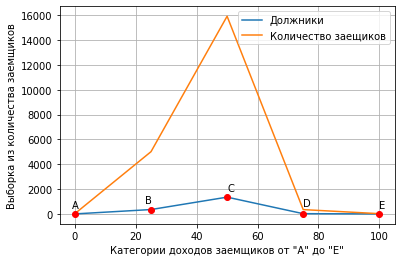

In [28]:
table_3 = data.groupby('total_income_category')['debt'].agg(['count', count_debt, percent_debt])
x = []
for i in range(0,125,25):
    x.append(i)
y = [int(i) for i in table_3['count_debt']]
x1 = x
y1 = [int(i) for i in table_3['count']]
location_a = [0, 2]
location_b = [25, 354]
location_c = [50, 1353]
location_d = [75, 21]
location_e = [100, 2]
plt.plot(x, y, label='Должники')
plt.plot(x1, y1, label='Количество заещиков')
plt.plot(location_a[0], location_a[1], 'or')
plt.annotate('A', xy = location_a, xytext=(location_a[0]-1, location_a[1]+500))
plt.plot(location_b[0], location_b[1], 'or')
plt.annotate('B', xy = location_b, xytext=(location_b[0]-2, location_b[1]+500))
plt.plot(location_c[0], location_c[1], 'or')
plt.annotate('С', xy = location_c, xytext=(location_c[0], location_c[1]+500))
plt.plot(location_d[0], location_d[1], 'or')
plt.annotate('D', xy = location_d, xytext=(location_d[0], location_d[1]+600))
plt.plot(location_e[0], location_e[1], 'or')
plt.annotate('E', xy = location_e, xytext=(location_e[0], location_e[1]+500))
plt.grid(axis='x')
plt.grid(axis='y')
plt.xlabel('Категории доходов заемщиков от "А" до "Е"')
plt.ylabel('Выборка из количества заемщиков')
plt.legend()
plt.show()
# Из графика видно, что количество должников от общего количества заемщиков слишком мало в категориях А, D и Е, поэтому 
# сложно делать какие-либо выводы по ним и сравнивать их с другими категориями в выборке.

**Вывод:** Категории "А" и "Е" с самыми болишими и маленькими доходами соответственно, имеют наименьшую выборку, поэтому сложно делать выводы на основании полученных данных. Категория "D" - интервал дохода от 30 до 50 т.руб, имеет наименьший процент должников. Учитывая доходы, скорей всего это молодые люди, которым одобряют небольшие кредиты. Самые большие выборки имеют категории "С" и "В", уровень дохода варьируется от 50-200 т.руб и 200-1000 т.руб. В данных группах процент должников состовляет 7,1-8,5%. Сравнивать две смежные по доходам категории с большой выборкой относительно остальных, имеющих маленькую - нецелесообразно. Поэтому лучше проводить анализ между категориями "С" и "В". Исходя из данных по этим категориям видно, что с увеливением доходов процент должников падает. По полученным данным можно сказать, что **зависимости между уровнем дохода и возвратом кредита - имеется.**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
# Группируем по категориям кредитов, сортируем в порядке убывания задолжников
data.groupby('purpose_category')['debt'].agg(['count', count_debt, percent_debt]).sort_values('percent_debt', ascending=False)

,count,count_debt,percent_debt
purpose_category,,,
операции с автомобилем,4279,400,9.3%
получение образования,3988,369,9.3%
проведение свадьбы,2313,183,7.9%
операции с недвижимостью,10751,780,7.3%


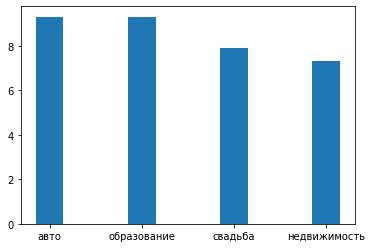

In [30]:
table_4 = data.groupby('purpose_category')['debt'].agg(['count', count_debt, percent_debt]).sort_values('percent_debt', ascending=False)

value = [float(i[:-1]) for i in table_4['percent_debt']]
names = ['авто','образование','свадьба','недвижимость']

# Строим столбчатую диаграмму (зависимость между количеством задолжников в процентах от семейного статуса):
plt.bar(names, height = value, width=0.3)
plt.show()

**Вывод:** Первое место задолжников делят между собой группы людей с кредитами на автомобиль и образование. Второе место задолжников - это люди, которые берут кредит на проведение свадьбы. Самые ответвенные клиенты те, кто взял кредит на недвижимость. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В банке не оформят кредит не взяв у заемщика определенные данные. Пропуска в данных скорей всего связаны с человеческим фактором - ручное заполнение. Так же при импорте и экспорте, сохранении файлов мог менятся формат или теряться данные, что в последвии привело к пропускам.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Количественные переменные - могут принимать любые значения из диапазона. Отсортировывая данные в порядке возрастания или убывания значений, мы не можем говорить о плавных переходах, потому что существуют дискретные значения, которые лежат в диапазоне, но могут сильно отличаться от других. Медианное значение как раз игнорирует такие величины, чего не делает среднее арефметическое.

### Шаг 4: общий вывод.

**1. Исследование зависимости между количеством детей и возвратом кредита в срок.**

Исходя из данных, полученных в резутате исследования, можно наблюдать небольшую закономерность: категория, имеющая наименьший процент задолжников, - это люди без детей. С увеличением количества детей в семьях процент задолжников поднимается. Наивысший процент по задолжникам показала группа с четыремя детьми. Так же следует сказать о группе семей, имеющих пять детей. Данную группу лучше не использовать для оценки результатов, т.к. выборка очень мала. **Вывод: с увеличением количества детей - количество задолжников растет.**

**2. Исследование зависимости между семейным положением и возвратом кредита в срок.**

Проанализировав данные, полученные при исследование этой зависимости, можно выделить три основные группы:

**2.1.** К первой группе относятся задолжники с семейным статусом: "гражданский брак" и "Не женат / не замужем". В данных категориях наивысший процент задолжников. Есть предположение, что основная масса данной категории это молодые люди, которые, как правило имеют маленький жизненный опыт и являются более безответсвенными по сравнению с другими группами.

**2.2.** Ко второй группе относятся задолжники с семейным статусом: "женат / замужем" и "в разводе". Данные категории имеют средний процент задолжников относительно других категорий. Скорей всего это группа людей среднего возраста, которые более ответсвенно подходят к различным вещам.

**2.3.** К третьей группе относятся задолжники с семейным статусом: "вдовец / вдова". Данная категория имеет наименьший процент задолжников. С большой точностью можно сказать, что это категория людей пожилого возраста, которая является еще более пунктуальной, нежели остальные категории.

Анализируя данные группы, можно сделать выврод, что **семейное положение, определенных групп, влияет на возврат кредита в срок.**

**3. Исследование зависимости между уровнем дохода и возвратом кредита в срок.**

Для удолбства работы с данными в этом разделе было принято разделить категории людей по уровню дохода на пять групп:

Категория "A" - доход свыше 1 млн.руб.

Категория "B" - доход от 200 тыс.руб. до 1 млн.руб.

Категория "C" - доход от 50 тыс.руб. до 200 тыс.руб.

Категория "D" - доход от 30 тыс.руб. до 50 тыс.руб.

Категория "E" - доход до 30 тыс.руб.

Работая с данными в этом разделе, возникла проблема выборки из малого количества, которая влечет за собой неточность вывода относительно категорий с хорошей выборкой. В группах категорий A, D и E выборка - **очень мала**, в связи с этим данные не целесообразно учитывать. Поэтому сравнение проводилось между группами с большой выборкой, а именно B и С. Рассматривая данные группы, можно сделать тривиальный вывод о том, что **с увеличением доходов заемщиков, количество задолжников - падает.**

**4. Исследование о том, как разные цели кредита влияют на его возврат в срок.**

Всех заемщиков можно раздилить на четыре основные группы по целям взятия кредита:

**4.1.** Заемщики, взявшие кредит на: **операции с автомобилем**. Процент должников состовляет: 9.3%

**4.2.** Заемщики, взявшие кредит на: **получение образования**. Процент должников состовляет: 9.3%

**4.3.** Заемщики, взявшие кредит на: **проведение свадьбы**. Процент должников состовляет: 7.9%

**4.4.** Заемщики, взявшие кредит на: **операции с недвижимостью**. Процент должников состовляет: 7.3%

Сухая аналитика, выборка во всех группах достаточно большая, поэтому можно смело говорить, что первое место по должникам делят группы взявшие кредит на транспортное средство и получение образования. Скорей всего, большая часть лудей этих групп - молодые люди. Лучше вопрос обстоит с группами людей, взявших кредит на проведение свадьбы и операциями с недвижимостью. Данные группы показывают лучшие показатели по количеству должников - их меньше всего. Вывод простой, **цели кредита влияют на его возврат в срок.** 

**5. Возможные причины появления пропусков в исходных данных**

Среди основных причин появления пропусков в исходных данных можно выделить две главных: **1. Человеческий фактор.** Люди слишком часто допускают ошибки при заполнении различного рода форм, это не является ни для кого загадкой. **2. Обработка и выгрузка данных.** Информация имеет свойство терятся, когда различного рода данные экспортируют и импортируют в другие среды разработки, а потом сохраняют, что впоследсвии и влечет за собой потерю.

**6. Заполнение пропусков медианным значением — лучшее решение для количественных переменных.**

Действительно так, использовать среднее арифметическое значение - не всегда лучший вариант, при работе с количественными переменными. Это связано с тем, что в данных могут присутствовать аномальные значения, которые будут сильно влиять на конечный результат. Медиана - решение этой проблемы, она игнорирует эти экстремумы и аномальные значения.